In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv("C:/Users/onkar/Downloads/4_may_prj/Decision Tree Project8/Decision Tree  - Assignment -4/iphone_purchase_records.csv")
data.head(5)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [5]:
df = data.copy()
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


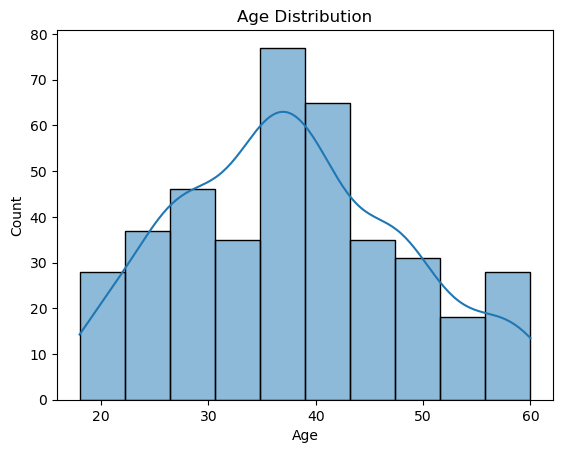

In [7]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.savefig('graphs/age_distributionPRJ8.png')
plt.show()

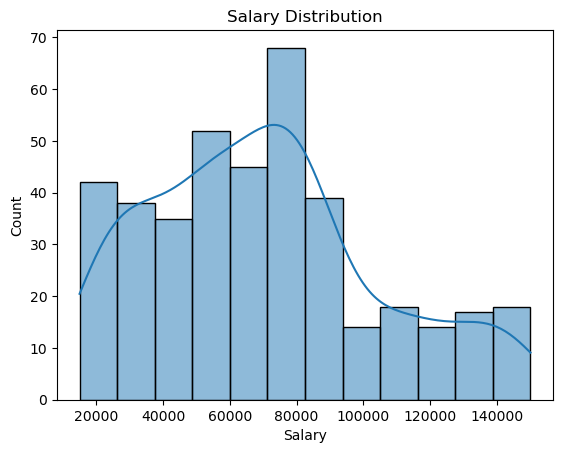

In [8]:
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.savefig('graphs/salary_distributionPRJ8.png')
plt.show()

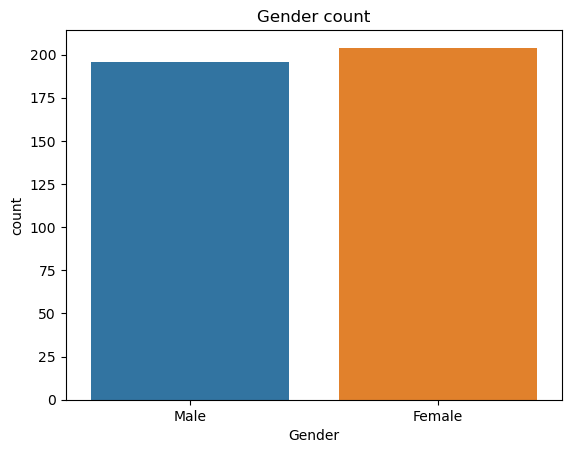

In [9]:
sns.countplot(x = 'Gender', data =df)
plt.title('Gender count')
plt.savefig('graphs/gender_countPRJ8.png')
plt.show()

C:\Users\onkar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


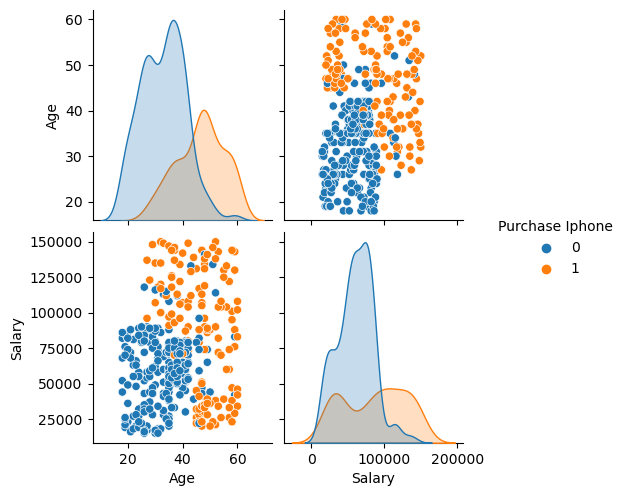

In [10]:
sns.pairplot(df,hue = 'Purchase Iphone')
plt.savefig('graphs/pairplotPRJ8.png')
plt.show()

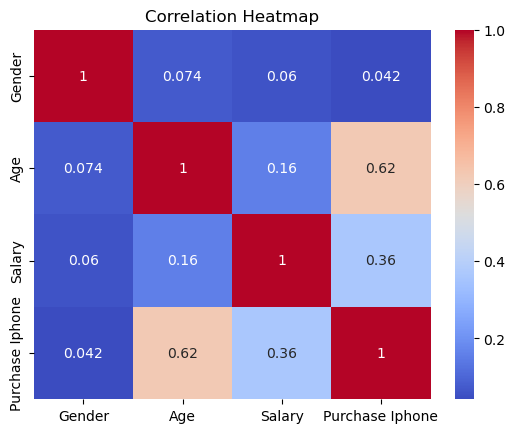

In [11]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('graphs/correlation_heatmapPRJ8.png')
plt.show()

In [12]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [13]:
X = df[['Age','Gender','Salary']]
y = df['Purchase Iphone']

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)

In [63]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [64]:
pred = tree_model.predict(X_test)

In [66]:
accuracy = accuracy_score(y_test, pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9375


In [67]:
accuracy = accuracy_score(y_test,pred)
print("Accuracy Score:",accuracy)
print("Classification Report:\n",classification_report(y_test,pred))
print("Confusion Matrix", confusion_matrix(y_test,pred))

Accuracy Score: 0.9375
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.90      0.93      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80

Confusion Matrix [[49  3]
 [ 2 26]]


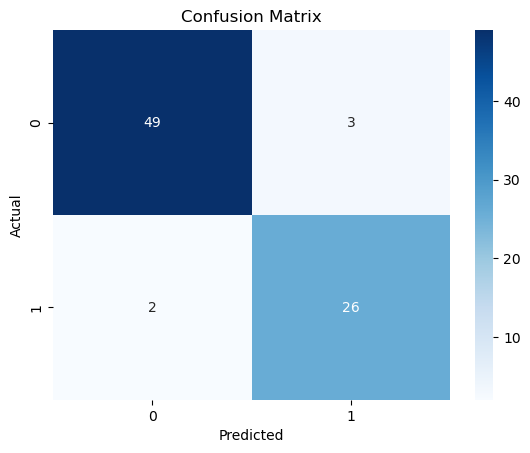

In [68]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('graphs/confusion_matrix.png')
plt.show()